In [29]:
import sys

import torch
import matplotlib.pyplot as plt

from lib.models.hopfield import Hopfield
from lib.plot.hopfield import plot_hopfield_evolution, converged_to_attractor

# 1. Hopfield Network

A Hopfield recurrent network has one layer of $N$ neurons with a [`hardtanh`](https://pytorch.org/docs/stable/generated/torch.nn.Hardtanh.html#torch.nn.Hardtanh) activation function, and is fully interconnected: each neuron is connected to every other neuron.

A Hopfield network is created from a set of *attractors*. When feeding the output for a given input back into the network, the output should converge to one of the attractors. As the attractor is a stable state of the network, the output will not change once an attractor is reached.

Let's create a 2-neuron Hopfield network with 3 attractors: $(1, 1)$, $(-1, -1)$ and $(1, -1)$.

In [30]:
# Define 3 attractors
T = torch.tensor([
    [1., 1.],
    [-1., -1.],
    [1., -1.]
])

# Create the Hopfield network from the attractors
net = Hopfield(T)

We can now feed some random inputs to the network and see where they evolve to. The attractors of the network are indicated with a cross in the plot.

<AxesSubplot:>

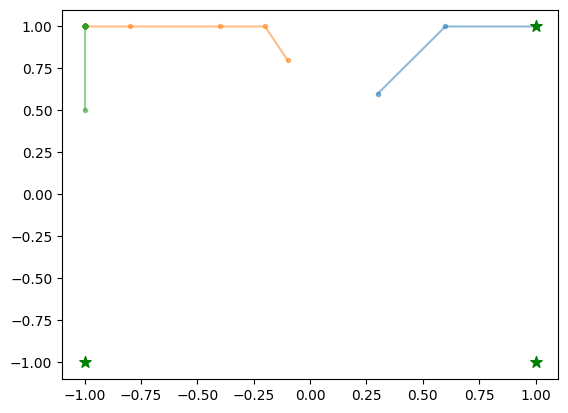

In [31]:
# Define 3 random inputs
P = torch.tensor([
    [0.3, 0.6],
    [-0.1, 0.8],
    [-1., 0.5],
])


# Show the evolution during 20 steps
plot_hopfield_evolution(net, P, num_steps=20)

## 1.1 A two neuron Hopfield network

<AxesSubplot:>

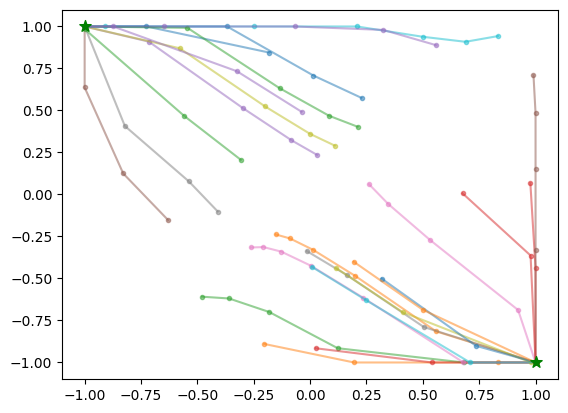

In [32]:
# Define a 2-neuron Hopfield network with 2 attractors
T1 = torch.tensor([
    [1., -1.],
    [-1., 1.]
])
net1 = Hopfield(T1)

# Now create 25 random 2D points in range [-1, 1]
P = 2*torch.rand((25, 2)) - 1

# See how the points evolve
plot_hopfield_evolution(net1, P, num_steps=20)

Note that if the Hopfield network starts out closer to the upper-left, it will go to the upper-left, and vice versa.  This ability to find the closest memory to an initial input is what makes the Hopfield network useful.

## 1.2 A Hopfield network with unstable equilibrium

Unfortunately, the network has undesired stable points at places other than the corners.  We can see this when we simulate the Hopfield for the five initial weights, `P2`.

These points are exactly between the two target stable points. They are attracted by an undesired point in the center of the plot.

<AxesSubplot:>

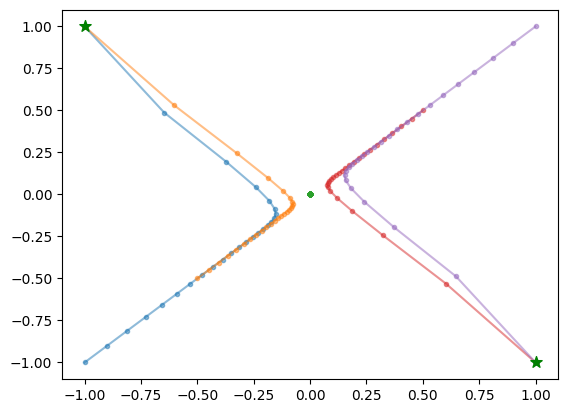

In [33]:
# Define a 2-neuron Hopfield network with 2 attractors
T2 = torch.tensor([
    [1., -1.],
    [-1., 1.]
])
net2 = Hopfield(T2)

# Some cherry-picked starting points...
P2 = torch.tensor([
    [-1.0, -1.0],
    [-0.5, -0.5],
    [0.0, 0.0],
    [0.5, 0.5],
    [1.0, 1.0]
])

# Let's see how they evolve...
plot_hopfield_evolution(net2, P2, num_steps=50)

## 1.3 A three neuron Hopfield network

<Axes3DSubplot:>

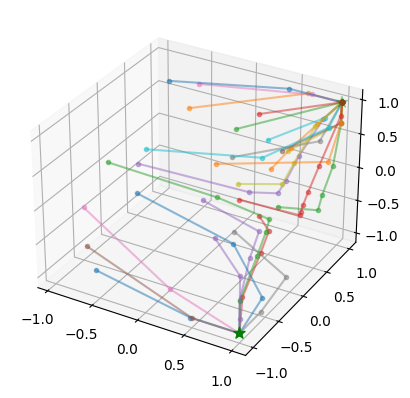

In [63]:
# Define a 3-neuron Hopfield network with 2 attractors
T3 = torch.tensor([
    [1., -1., -1.],
    [1., 1., -1],
])
net3 = Hopfield(T3)

# Let's see how 25 random inputs evolve...
P3a = 2*torch.rand((25, 3)) - 1
plot_hopfield_evolution(net3, P3a, num_steps=20)

The points in `P3b` are exactly between the two target stable points. They all move into a point at the center of the line connecting the two attractors.

<Axes3DSubplot:>

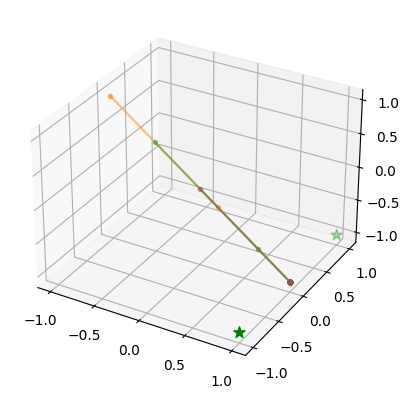

In [35]:
# Some cherry-picked starting points...
P3b = torch.tensor([
    [ 1.0, 0.0, -1.0],
    [-1.0, 0.0,  1.0],
    [-0.5, 0.0,  0.5],
    [ 1.0, 0.0, -1.01],
    [ 1.0, 0.0, -1.0],
    [ 0.0, 0.0,  0.0],
])


# Let's see how they evolve...
plot_hopfield_evolution(net3, P3b, num_steps=10)

## 1.4 Spurious stable points

Here we define 4 random starting points and simulate the Hopfield network for 50 steps.

Some initial conditions will lead to desired stable points.  Others will lead to undesired stable points.

In [36]:
# Define a 5-neuron Hopfield network with 4 attractors
T4 = torch.tensor([
    [1., -1., -1., 1., -1.],
    [1., 1., -1., 1., -1.],
    [-1., 1., -1., 1., 1.],
    [1., -1., 1., 1., 1.],
])
net4 = Hopfield(T4)


# Now create 4 random 5D points in range [-1, 1]
P4 = torch.rand((4, 5))*2 - 1

Of course, we cannot plot a trajectory of 5D points. To run 50 recurrent steps manually, we can use the following `for`-loop.

In [37]:
for _ in range(50):
    P4 = net4(P4)

Now `P4` contains the outputs after 50 steps. Let's check them out:

In [38]:
print(P4)

tensor([[-1., -1., -1.,  1.,  1.],
        [ 1.,  1., -1.,  1., -1.],
        [ 1.,  1., -1.,  1., -1.],
        [-1., -1., -1.,  1.,  1.]])


We can check if `P4` converged to any of the attractors of our network with the function `converged_to_attractor()`. It will print, for each vector in `P4` whether or not it has converged.

In [39]:
converged_to_attractor(P4, net4.attractors)

tensor([False,  True,  True, False])

## 1.5 Exercises

1. Create a Hopfield network with attractors $(1, 1)$, $(−1, −1)$, $(1, −1)$ and the corresponding number of neurons. Start with various initial vectors and note down the obtained attractors after a sufficient number of iterations.
  - Are the real attractors the same as those used to create the network? If not, why do we get these unwanted attractors?
  - How many iterations does it typically take to reach the attractor?
  - What can you say about the stability of the attractors?
2. Do the same for  a Hopfield network with attractors $(1, 1, 1)$, $(−1, −1, 1)$, $(1, −1, -1)$.
3. The function `hopdigit()` creates a Hopfield network which has as attractors the handwritten digits $0,\ldots, 9$. To test the ability of the network to correctly retrieve these patterns, some noisy digits are given to the network.
  - Is the Hopfield model always able to reconstruct the noisy digits? If not why?
  - What is the influence of the noise on the number of iterations?

You can call the function by typing:
```python
from lib.widgets.hopdigit import hopdigit

hopdigit(noise_level, num_steps)
```

where:

- `noise_level` represents the level of noise that will corrupt the digits and is a positive number.
- `num_steps` is the number of iterations the Hopfield network (having as input the noisy digits) will run.

Try to answer the above question by playing with these two parameters.

[GOEDE LINK](https://www.youtube.com/watch?v=piF6D6CQxUw)

<AxesSubplot:>

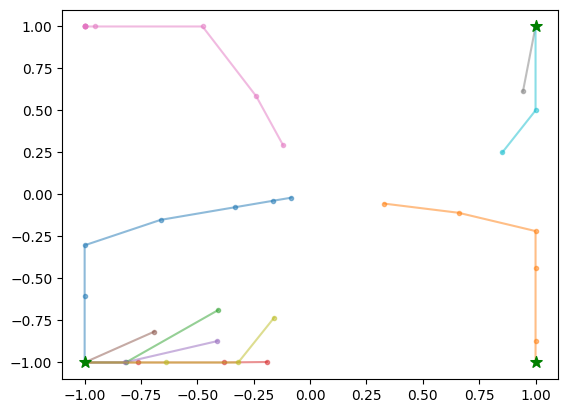

In [54]:
T5 = torch.tensor([
     [1.,1.],
     [-1.,-1.],
     [1., -1.]
])
net5 = Hopfield(T5)

P5 = torch.rand((10, 2))*2 - 1

plot_hopfield_evolution(net5, P5, num_steps=10)

<Axes3DSubplot:>

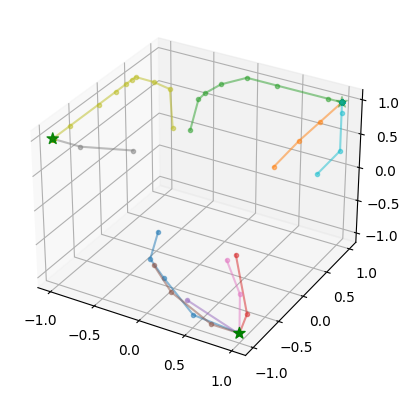

In [62]:
T6 = torch.tensor([
     [1.,1.,1.],
     [-1.,-1.,1.],
     [1., -1., -1.]
])
net6 = Hopfield(T6)

P6 = torch.rand((10, 3))*2 - 1

plot_hopfield_evolution(net6, P6, num_steps=1000)

  0%|          | 0/100000 [00:00<?, ?it/s]

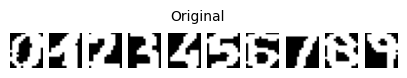

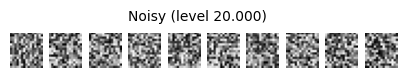

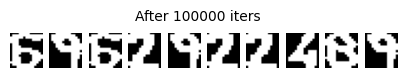

In [69]:
from lib.widgets.hopdigit import hopdigit

noise_level = 20
num_steps = 100000

hopdigit(noise_level, num_steps)